## Importing librariesl

In [1]:
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# pd.set_option('max_columns', 200)

## Load training data

In [2]:
data = []
with open('/kaggle/input/nslkdd/KDDTrain+.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['duration',  'protocol_type', 'service',  'flag',  'src_bytes' , 'dst_bytes' , 'land' , 'wrong_fragment' , 'urgent' , 'hot' , 'num_failed_logins' ,
 'logged_in' , 'num_compromised' , 'root_shell' , 'su_attempted' , 'num_root' , 'num_file_creations' , 'num_shells' , 'num_access_files' , 'num_outbound_cmds' ,
 'is_host_login' , 'is_guest_login' , 'count' , 'srv_count' , 'serror_rate' , 'srv_serror_rate' , 'rerror_rate' , 'srv_rerror_rate' , 'same_srv_rate' ,
 'diff_srv_rate' , 'srv_diff_host_rate' , 'dst_host_count' , 'dst_host_srv_count' , 'dst_host_same_srv_rate' , 'dst_host_diff_srv_rate' , 'dst_host_same_src_port_rate' ,
 'dst_host_srv_diff_host_rate' , 'dst_host_serror_rate', 'dst_host_srv_serror_rate' , 'dst_host_rerror_rate' , 'dst_host_srv_rerror_rate' , 'class' ,]
    
df = pd.DataFrame(data[44:], columns=names)

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df.shape

(125973, 42)

In [5]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [6]:
df.dtypes

duration                       object
protocol_type                  object
service                        object
flag                           object
src_bytes                      object
dst_bytes                      object
land                           object
wrong_fragment                 object
urgent                         object
hot                            object
num_failed_logins              object
logged_in                      object
num_compromised                object
root_shell                     object
su_attempted                   object
num_root                       object
num_file_creations             object
num_shells                     object
num_access_files               object
num_outbound_cmds              object
is_host_login                  object
is_guest_login                 object
count                          object
srv_count                      object
serror_rate                    object
srv_serror_rate                object
rerror_rate 

In [7]:
# Define the expected data types based on the research paper
expected_data_types = {
    'duration': 'float64',
    'protocol_type': 'category',
    'service': 'category',
    'flag': 'category',
    'src_bytes': 'float64',
    'dst_bytes': 'float64',
    'land': 'category',
    'wrong_fragment': 'float64',
    'urgent': 'float64',
    'hot': 'float64',
    'num_failed_logins': 'float64',
    'logged_in': 'category',
    'num_compromised': 'float64',
    'root_shell': 'float64',
    'su_attempted': 'float64',
    'num_root': 'float64',
    'num_file_creations': 'float64',
    'num_shells': 'float64',
    'num_access_files': 'float64',
    'num_outbound_cmds': 'float64',
    'is_host_login': 'category',
    'is_guest_login': 'category',
    'count': 'float64',
    'srv_count': 'float64',
    'serror_rate': 'float64',
    'srv_serror_rate': 'float64',
    'rerror_rate': 'float64',
    'srv_rerror_rate': 'float64',
    'same_srv_rate': 'float64',
    'diff_srv_rate': 'float64',
    'srv_diff_host_rate': 'float64',
    'dst_host_count': 'float64',
    'dst_host_srv_count': 'float64',
    'dst_host_same_srv_rate': 'float64',
    'dst_host_diff_srv_rate': 'float64',
    'dst_host_same_src_port_rate': 'float64',
    'dst_host_srv_diff_host_rate': 'float64',
    'dst_host_serror_rate': 'float64',
    'dst_host_srv_serror_rate': 'float64',
    'dst_host_rerror_rate': 'float64',
    'dst_host_srv_rerror_rate': 'float64',
    'class': 'category'
}

# Convert columns to appropriate data types
df = df.astype(expected_data_types)


In [8]:
df.dtypes

duration                        float64
protocol_type                  category
service                        category
flag                           category
src_bytes                       float64
dst_bytes                       float64
land                           category
wrong_fragment                  float64
urgent                          float64
hot                             float64
num_failed_logins               float64
logged_in                      category
num_compromised                 float64
root_shell                      float64
su_attempted                    float64
num_root                        float64
num_file_creations              float64
num_shells                      float64
num_access_files                float64
num_outbound_cmds               float64
is_host_login                  category
is_guest_login                 category
count                           float64
srv_count                       float64
serror_rate                     float64


In [9]:
X = df.drop(["class"],axis = 1)

In [10]:
X.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

## Encoding Categorical Data

In [11]:
# Protocol type
X['protocol_type'] = df['protocol_type'].astype('category').cat.codes

# Land
X['land'] = pd.Categorical(df['land'], ['0', '1']).codes

# Is logged in
X['logged_in'] = pd.Categorical(df['logged_in'], ['0', '1']).codes

# Host logged in
X['is_host_login'] = pd.Categorical(df['is_host_login'], ['0', '1']).codes

# Guest logged in
X['is_guest_login'] = pd.Categorical(df['is_guest_login'], ['0', '1']).codes

# Class
Y = pd.Categorical(df['class'], ['normal', 'anomaly']).codes


### Count unique values.

In [12]:
df["class"].value_counts()

class
normal     67343
anomaly    58630
Name: count, dtype: int64

### view final trainig set.

In [13]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,1,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,2,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,1,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,1,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,1,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [14]:
from sklearn.preprocessing import LabelEncoder

le_service = LabelEncoder()
X['service'] = le_service.fit_transform(df['service'])

le_flag = LabelEncoder()
X['flag'] = le_flag.fit_transform(df['flag'])



In [15]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,1,20,9,491.0,0.0,0,0.0,0.0,0.0,...,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,2,44,9,146.0,0.0,0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,...,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,1,24,9,232.0,8153.0,0,0.0,0.0,0.0,...,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,1,24,9,199.0,420.0,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Eliminate correlated features.

In [16]:
import pandas as pd
import numpy as np

# Assuming df_cleaned is your DataFrame after removing null-valued columns
# Compute correlation matrix

correlation_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

# Find features with correlation greater than threshold (e.g., 0.95)
threshold = 0.95
correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop correlated features
df_uncorrelated = X.drop(columns=correlated_features)

# Check the shape of the DataFrame after dropping correlated features
print("Shape of DataFrame after dropping correlated features:", df_uncorrelated.shape)

Shape of DataFrame after dropping correlated features: (125973, 35)


### uncorrelated collumns

In [17]:
df_uncorrelated.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate'],
      dtype='object')

In [18]:

# Specify the columns to be standardized
columns_to_standardize = df_uncorrelated.columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the specified columns
X = scaler.fit_transform(X[columns_to_standardize])


In [19]:
print(f"X : {type(X)} Y : {type(Y)}")

X : <class 'numpy.ndarray'> Y : <class 'numpy.ndarray'>


## Validation Data Preparation

In [20]:
data_validate = []
with open('/kaggle/input/nslkdd/KDDTrain+_20Percent.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data_validate.append(line.split(','))


names = ['duration',  'protocol_type', 'service',  'flag',  'src_bytes' , 'dst_bytes' , 'land' , 'wrong_fragment' , 'urgent' , 'hot' , 'num_failed_logins' ,
 'logged_in' , 'num_compromised' , 'root_shell' , 'su_attempted' , 'num_root' , 'num_file_creations' , 'num_shells' , 'num_access_files' , 'num_outbound_cmds' ,
 'is_host_login' , 'is_guest_login' , 'count' , 'srv_count' , 'serror_rate' , 'srv_serror_rate' , 'rerror_rate' , 'srv_rerror_rate' , 'same_srv_rate' ,
 'diff_srv_rate' , 'srv_diff_host_rate' , 'dst_host_count' , 'dst_host_srv_count' , 'dst_host_same_srv_rate' , 'dst_host_diff_srv_rate' , 'dst_host_same_src_port_rate' ,
 'dst_host_srv_diff_host_rate' , 'dst_host_serror_rate', 'dst_host_srv_serror_rate' , 'dst_host_rerror_rate' , 'dst_host_srv_rerror_rate' , 'class' ,]
    
df_validate = pd.DataFrame(data[44:], columns=names)

In [21]:
# Convert columns to appropriate data types
df_validate = df_validate.astype(expected_data_types)

# Preparing validation data

In [22]:
X_val = df.drop(["class"],axis = 1)

### Encodign categoricals

In [23]:
# Protocol type
X_val['protocol_type'] = df_validate['protocol_type'].astype('category').cat.codes

# Land
X_val['land'] = pd.Categorical(df_validate['land'], ['0', '1']).codes

# Is logged in
X_val['logged_in'] = pd.Categorical(df_validate['logged_in'], ['0', '1']).codes

# Host logged in
X_val['is_host_login'] = pd.Categorical(df_validate['is_host_login'], ['0', '1']).codes

# Guest logged in
X_val['is_guest_login'] = pd.Categorical(df_validate['is_guest_login'], ['0', '1']).codes

# Class
Y_val = pd.Categorical(df_validate['class'], ['normal', 'anomaly']).codes

In [24]:
from sklearn.preprocessing import LabelEncoder

le_service = LabelEncoder()
X_val['service'] = le_service.fit_transform(df_validate['service'])

le_flag = LabelEncoder()
X_val['flag'] = le_flag.fit_transform(df_validate['flag'])

### Keeping only uncorrelateds

In [25]:
# Specify the columns to be standardized
columns_to_standardize = df_uncorrelated.columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the specified columns
X_val = scaler.fit_transform(X_val[columns_to_standardize])

In [26]:
type(X_val)

numpy.ndarray

# Building Model of CNN & Bi-LSTM

In [28]:
from keras.models import Model, load_model
from keras.layers import Input, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

def create_bilstm_cnn_model(input_shape):
    # Input layer
    input_layer = Input(shape=input_shape)

    # Bi-LSTM branch
    lstm_output = LSTM(64, return_sequences=True)(input_layer)
    lstm_output = Dropout(0.5)(lstm_output)
    lstm_output = LSTM(32)(lstm_output)
    lstm_output = Dropout(0.5)(lstm_output)

    # CNN branch
    cnn_output = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
    cnn_output = MaxPooling1D(pool_size=2)(cnn_output)
    cnn_output = Flatten()(cnn_output)
    cnn_output = Dense(32, activation='relu')(cnn_output)
    cnn_output = Dropout(0.5)(cnn_output)

    # Combine LSTM and CNN branches
    combined = Concatenate()([lstm_output, cnn_output])
    combined = Dense(64, activation='relu')(combined)
    combined = Dropout(0.3)(combined)
    output = Dense(1, activation='sigmoid')(combined)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Reshape training data
# X_resampled_np = X_resampled.to_numpy()
X_train = np.expand_dims(X, axis=2)  # Reshape to (samples, timesteps, features)
n_samples, n_timesteps, n_features = X_train.shape


# Create and compile the model
model = create_bilstm_cnn_model((n_timesteps, n_features))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Define the checkpoint callback to save the best model during training
checkpoint_path = '/kaggle/working/best_model.keras'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', save_weights_only=False)

# Training the model
history = model.fit(
    X_train, Y,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, Y_val),
    callbacks=[EarlyStopping(patience=5), checkpoint]
)

results = model.evaluate(X_val, Y_val, verbose=0)
accuracy = results[1]

# Predictions
Y_pred_val = model.predict(X_val)
Y_pred_val = (Y_pred_val > 0.5).astype(int)

    # Calculate precision, recall, and f1-score
precision = precision_score(Y_val, Y_pred_val)
recall = recall_score(Y_val, Y_pred_val)
f1 = f1_score(Y_val, Y_pred_val)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 35, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 33, 64)    │        256 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 35, 64)    │     16,896 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 16, 64)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 35, 64)    │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1024)      │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 32)        │     12,416 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │     32,800 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 32)        │          0 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 32)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 64)        │          0 │ dropout_5[0][0],  │
│ (Concatenate)       │                   │            │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      4,160 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 64)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         65 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 66,593 (260.13 KB)

 Trainable params: 66,593 (260.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 50s 12ms/step - accuracy: 0.9521 - loss: 0.1346 - val_accuracy: 0.9849 - val_loss: 0.0425
Epoch 2/20
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 46s 12ms/step - accuracy: 0.9788 - loss: 0.0548 - val_accuracy: 0.9858 - val_loss: 0.0342
Epoch 3/20
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 46s 12ms/step - accuracy: 0.9828 - loss: 0.0453 - val_accuracy: 0.9885 - val_loss: 0.0313
Epoch 4/20
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - accuracy: 0.9858 - loss: 0.0410 - val_accuracy: 0.9898 - val_loss: 0.0311
Epoch 5/20
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - accuracy: 0.9879 - loss: 0.0361 - val_accuracy: 0.9928 - val_loss: 0.0253
Epoch 6/20
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - accuracy: 0.9884 - loss: 0.0335 - val_accuracy: 0.9913 - val_loss: 0.0230
Epoch 7/20
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 45s 11ms/step - accuracy: 0.9891 - loss: 0.0317 - val_accuracy: 0.9924 - val_loss: 0.0217
Epoch 8/20
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - accuracy: 0.9901 -

### Evaluation matrices

In [30]:
# Print the results
print(f'Mean Accuracy: {accuracy:.4f}')
print(f'Mean Precision: {precision:.4f}')
print(f'Mean Recall: {recall:.4f}')
# print(f'Mean F1-Score: {f1_score:.4f}')

Mean Accuracy: 0.9953
Mean Precision: 0.9970
Mean Recall: 0.9930


### Save model

In [31]:
# Save the best model for future use
final_model_path = '/kaggle/working/final_best_model.keras'
model.save(final_model_path)

### Model Architecture

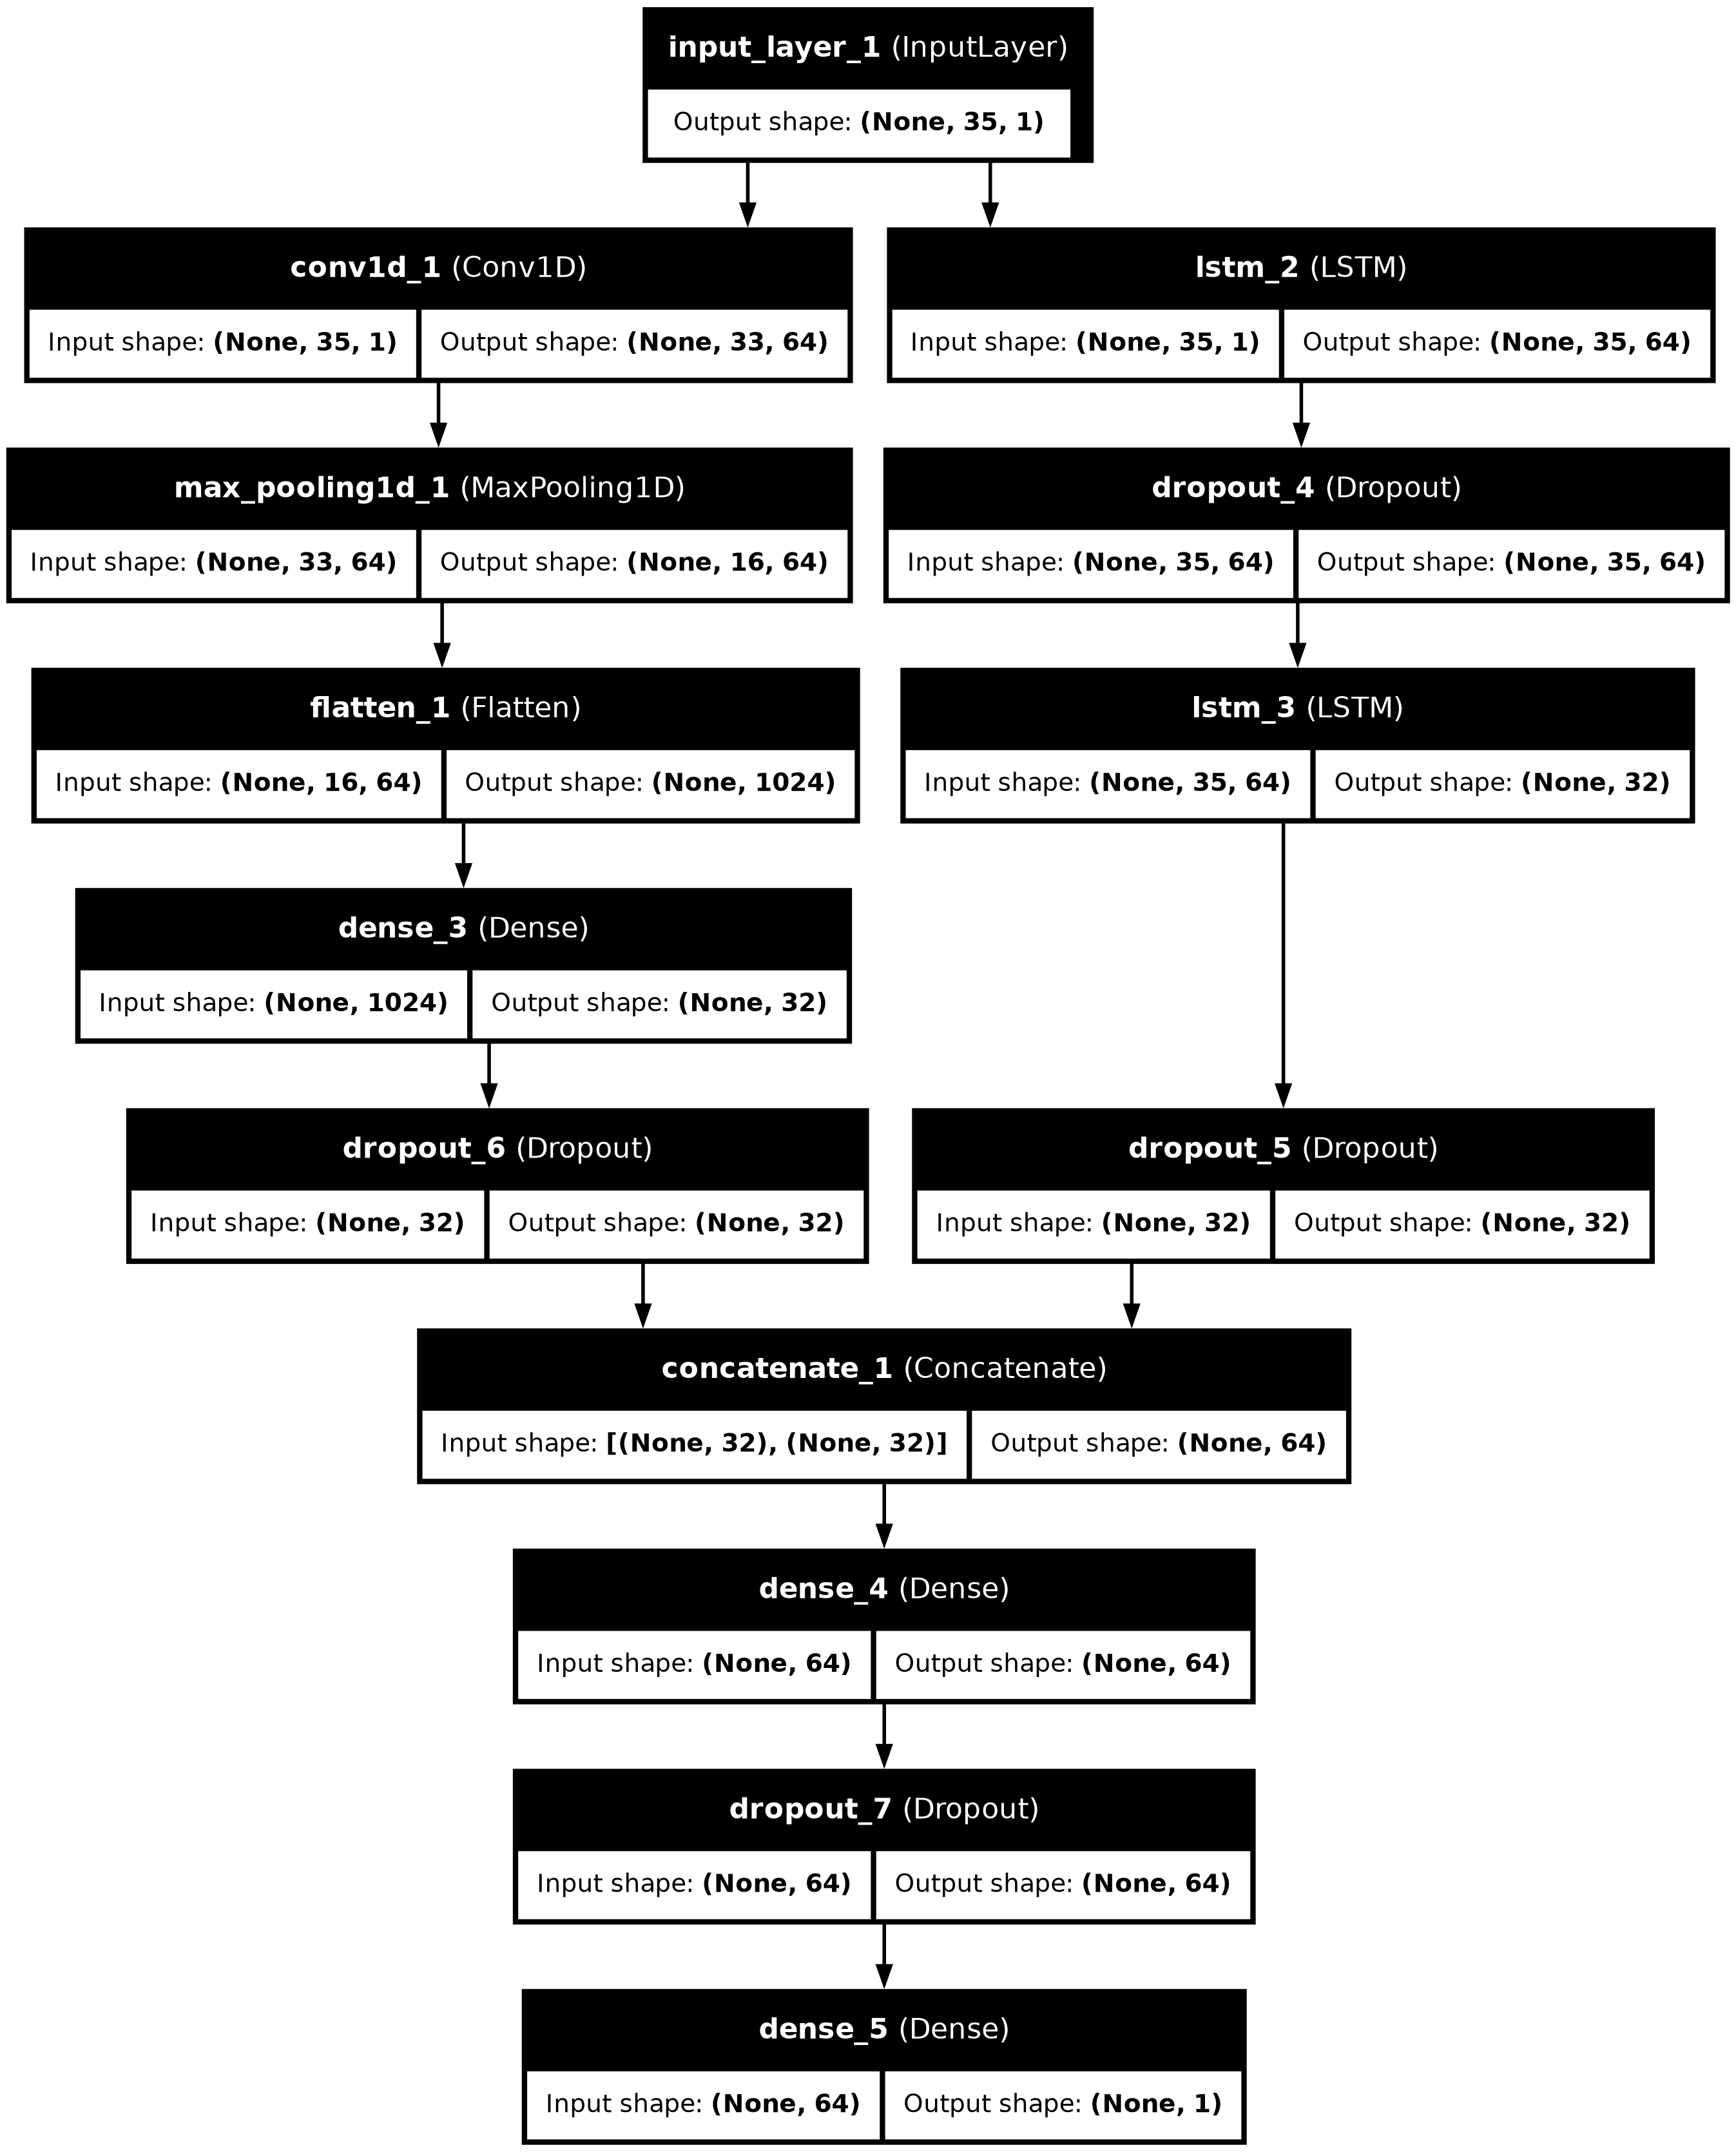

In [32]:
from keras.utils import plot_model
# Visualize the model architecture
plot_model(model, to_file='/kaggle/working/model_architecture.png', show_shapes=True, show_layer_names=True)

### Visualizing Training History

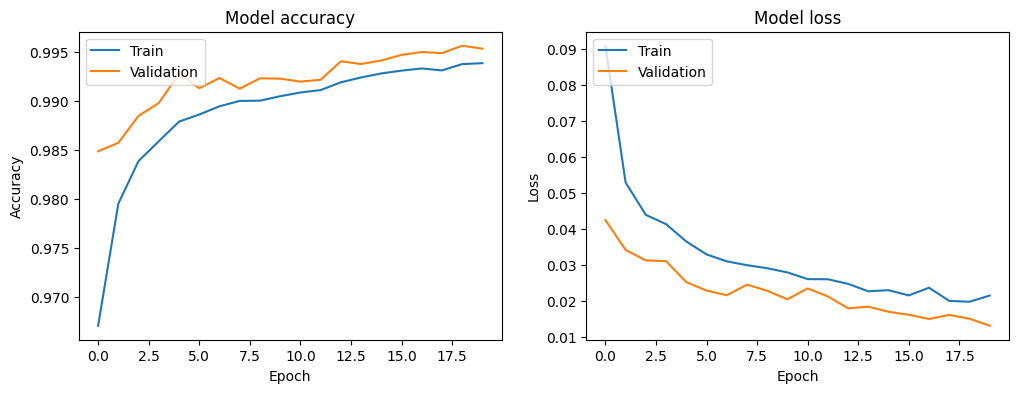

In [34]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy and loss for the best model
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('/kaggle/working/training_validation_curves.png', bbox_inches='tight')
plt.show()


# Preparing test dataset

In [60]:
data_test = []
with open('/kaggle/input/nslkdd/KDDTest+.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data_test.append(line.split(','))


names = ['duration',  'protocol_type', 'service',  'flag',  'src_bytes' , 'dst_bytes' , 'land' , 'wrong_fragment' , 'urgent' , 'hot' , 'num_failed_logins' ,
 'logged_in' , 'num_compromised' , 'root_shell' , 'su_attempted' , 'num_root' , 'num_file_creations' , 'num_shells' , 'num_access_files' , 'num_outbound_cmds' ,
 'is_host_login' , 'is_guest_login' , 'count' , 'srv_count' , 'serror_rate' , 'srv_serror_rate' , 'rerror_rate' , 'srv_rerror_rate' , 'same_srv_rate' ,
 'diff_srv_rate' , 'srv_diff_host_rate' , 'dst_host_count' , 'dst_host_srv_count' , 'dst_host_same_srv_rate' , 'dst_host_diff_srv_rate' , 'dst_host_same_src_port_rate' ,
 'dst_host_srv_diff_host_rate' , 'dst_host_serror_rate', 'dst_host_srv_serror_rate' , 'dst_host_rerror_rate' , 'dst_host_srv_rerror_rate' , 'class' ,]
    
df_test = pd.DataFrame(data[44:], columns=names)

In [61]:
# Convert columns to appropriate data types
df_test = df_test.astype(expected_data_types)

## Preparing test data

In [62]:
X_test = df_test.drop(["class"],axis = 1)

### Encoding categorical data.

In [63]:
# Protocol type
X_test['protocol_type'] = df_test['protocol_type'].astype('category').cat.codes

# Land
X_test['land'] = pd.Categorical(df_test['land'], ['0', '1']).codes

# Is logged in
X_test['logged_in'] = pd.Categorical(df_test['logged_in'], ['0', '1']).codes

# Host logged in
X_test['is_host_login'] = pd.Categorical(df_test['is_host_login'], ['0', '1']).codes

# Guest logged in
X_test['is_guest_login'] = pd.Categorical(df_test['is_guest_login'], ['0', '1']).codes

# Class
Y_test = pd.Categorical(df_test['class'], ['normal', 'anomaly']).codes

In [64]:
from sklearn.preprocessing import LabelEncoder

le_service = LabelEncoder()
X_test['service'] = le_service.fit_transform(df_test['service'])

le_flag = LabelEncoder()
X_test['flag'] = le_flag.fit_transform(df_test['flag'])

### Keeping only uncorrelated data.

In [65]:
# Specify the columns to be standardized
columns_to_standardize = df_uncorrelated.columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the specified columns
X_test = scaler.fit_transform(X_test[columns_to_standardize])

In [66]:
type(X_test)

numpy.ndarray

In [67]:
type(Y_test)

numpy.ndarray

In [68]:
Y_test

array([0, 0, 1, ..., 0, 1, 0], dtype=int8)

### Prediction

In [69]:
# Make predictions
Y_pred_test = model.predict(X_test)

# Convert probabilities to binary labels
Y_pred_binary = (Y_pred_test > 0.5).astype(int)

# Display the predictions
print(Y_pred_binary)

3937/3937 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
[[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [0]]


### Evaluation

Accuracy: 0.9953
Precision: 0.9970
Recall: 0.9930
F1-Score: 0.9950
Confusion Matrix:
[[67166   177]
 [  409 58221]]


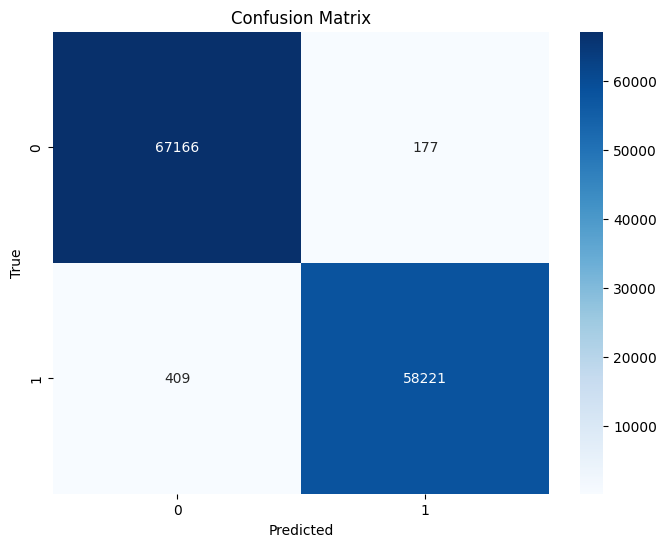

In [71]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'y_test' contains the true labels for the test data
# Ensure y_test is available; it should be the labels of your test dataset

# 1. Make Predictions
# Y_pred_lstm = model.predict(X_pred_lstm)
# Y_predicted_classes = (Y_pred_lstm > 0.5).astype(int).flatten()

# 2. Calculate Evaluation Metrics
accuracy = accuracy_score(Y_test, Y_pred_binary )
precision = precision_score(Y_test, Y_pred_binary )
recall = recall_score(Y_test, Y_pred_binary )
f1 = f1_score(Y_test, Y_pred_binary )
conf_matrix = confusion_matrix(Y_test, Y_pred_binary )

# 3. Print Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Plot the confusion matrix for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('/kaggle/working/confusion_matrix.png', bbox_inches='tight')
plt.show()
